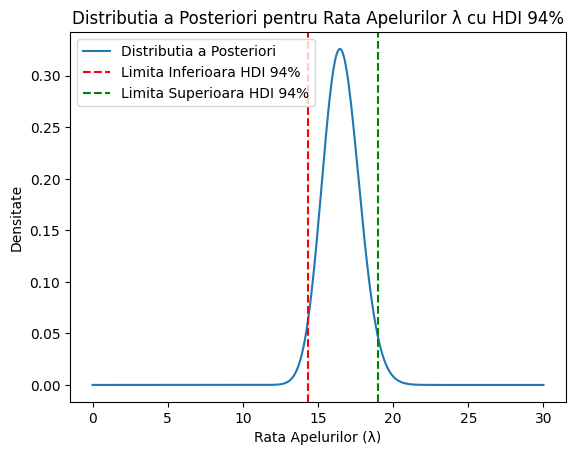

Intervalul HDI de 94% pentru λ: [14.33066776 18.97458508]


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

n_observatii = 10
suma_apeluri = 180

#param distributiei a priori Gamma + calc lor
alpha_prior = 2
beta_prior = 1
alpha_posterior = alpha_prior + suma_apeluri
beta_posterior = beta_prior + n_observatii

posterior_dist = stats.gamma(a=alpha_posterior, scale=1/beta_posterior) #definirea distributiei

#calc intervalului HDI de 94%
hdi_94 = az.hdi(posterior_dist.rvs(10000), hdi_prob=0.94)

#reprez grafica
lambda_vals = np.linspace(0, 30, 1000)
plt.plot(lambda_vals, posterior_dist.pdf(lambda_vals), label="Distributia a Posteriori")
plt.axvline(hdi_94[0], color="red", linestyle="--", label="Limita Inferioara HDI 94%")
plt.axvline(hdi_94[1], color="green", linestyle="--", label="Limita Superioara HDI 94%")
plt.xlabel("Rata Apelurilor (λ)")
plt.ylabel("Densitate")
plt.title("Distributia a Posteriori pentru Rata Apelurilor λ cu HDI 94%")
plt.legend()
plt.show()

print(f"Intervalul HDI de 94% pentru λ: {hdi_94}")